![Dr. Semmelweis](ignaz_semmelweis_1860.jpeg)

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on June 1st, 1847, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital.

The data is stored as two CSV files within the `data` folder.

`yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

Rows: 12 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): clinic
dbl (3): year, births, deaths

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 98 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (2): births, deaths
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


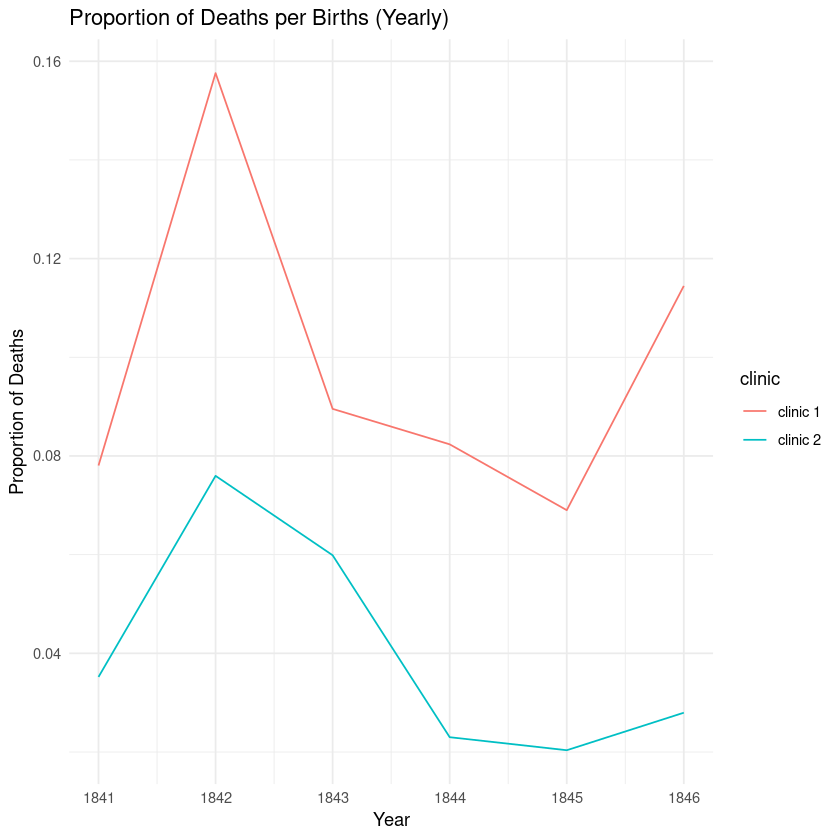

# A tibble: 2 × 2
  handwashing_started mean_proportion_deaths
  <lgl>                                <dbl>
1 FALSE                               0.105 
2 TRUE                                0.0211
# A tibble: 1 × 1
  reduction
      <dbl>
1   -0.0840


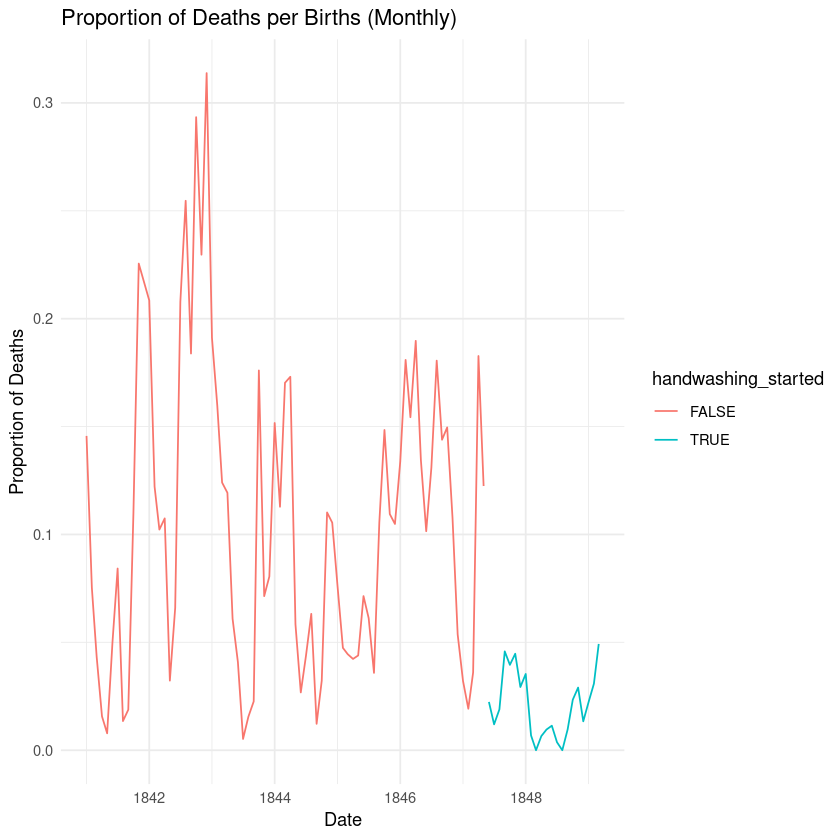

In [11]:
# Load libraries
library(tidyverse)

# Load data
yearly <- read_csv("data/yearly_deaths_by_clinic.csv")
monthly <- read_csv("data/monthly_deaths.csv")

# Add proportion_deaths column
yearly <- yearly %>%
  mutate(proportion_deaths = deaths / births)

monthly <- monthly %>%
  mutate(proportion_deaths = deaths / births)

# Yearly proportion of deaths plot
yearly_plot <- yearly %>%
  ggplot(aes(x = year, y = proportion_deaths, color = clinic)) +
  geom_line() +
  labs(
    title = "Proportion of Deaths per Births (Yearly)",
    x = "Year",
    y = "Proportion of Deaths"
  ) +
  theme_minimal()

print(yearly_plot)

# Add handwashing_started column
monthly <- monthly %>%
  mutate(handwashing_started = date >= as.Date("1847-06-01"))

# Monthly proportion of deaths plot with handwashing_started
monthly_plot <- monthly %>%
  ggplot(aes(x = date, y = proportion_deaths, color = handwashing_started)) +
  geom_line() +
  labs(
    title = "Proportion of Deaths per Births (Monthly)",
    x = "Date",
    y = "Proportion of Deaths"
  ) +
  theme_minimal()

print(monthly_plot)

# Calculate mean proportion of deaths before and after handwashing
monthly_summary <- monthly %>%
  group_by(handwashing_started) %>%
  summarise(mean_proportion_deaths = mean(proportion_deaths)) %>%
  rename(
    handwashing_started = handwashing_started,
    mean_proportion_deaths = mean_proportion_deaths
  )

# Display summary
print(monthly_summary)

# Calculate reduction in average death rate
reduction <- monthly_summary %>%
  summarise(
    reduction = diff(mean_proportion_deaths)
  )

print(reduction)
